In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA



In [4]:
# Load Iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [6]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(scaled_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
# Silhouette Score
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
agg_silhouette = silhouette_score(scaled_data, agg_labels)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)

# Davies-Bouldin Index
kmeans_db = davies_bouldin_score(scaled_data, kmeans_labels)
agg_db = davies_bouldin_score(scaled_data, agg_labels)

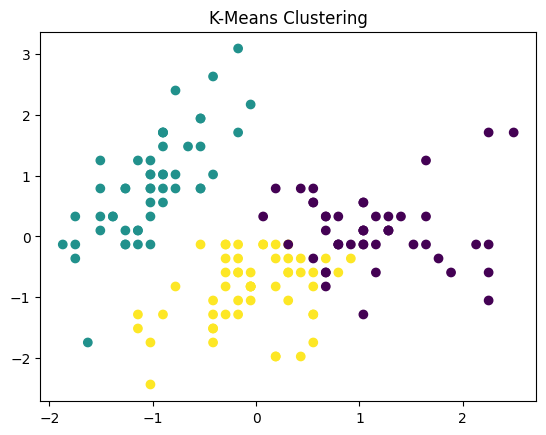

In [8]:
# Scatter plot for K-Means clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


In [14]:
# Define preprocessing techniques

preprocessing_techniques = {
    'No Preprocessing': lambda x: x,
    'Normalization': lambda x: StandardScaler().fit_transform(x),
    'Transformation': lambda x: x ** 0.5,
    'PCA': lambda x: PCA(n_components=2).fit_transform(x),  # Example PCA
    'Normalization + Transformation': lambda x: StandardScaler().fit_transform(x ** 0.5),
    'Normalization + Transformation + PCA': lambda x: PCA(n_components=2).fit_transform(StandardScaler().fit_transform(x ** 0.5))
}

# Define clustering parameters
clustering_parameters = [3, 4, 5]

# Define evaluation metrics
evaluation_metrics = {
    'Silhouette Score': silhouette_score,
    'Calinski-Harabasz': calinski_harabasz_score,
    'Davies-Bouldin Index': davies_bouldin_score
}

# Initialize empty tables
kmeans_table = pd.DataFrame(index=['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin Index'])
hierarchical_table = pd.DataFrame(index=['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin Index'])
dbscan_table = pd.DataFrame(index=['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin Index'])

# Iterate over clustering algorithms
for algorithm_name, algorithm, parameters_table in [('K-Means', KMeans, kmeans_table),
                                                    ('Hierarchical', AgglomerativeClustering, hierarchical_table),
                                                    ('DBSCAN', DBSCAN, dbscan_table)]:
    for preprocessing_name, preprocessing_func in preprocessing_techniques.items():
        for param in clustering_parameters:
            # Apply preprocessing
            data_preprocessed = preprocessing_func(df)

            # Fit clustering algorithm
            if algorithm_name == 'DBSCAN':
                labels = algorithm(eps=0.5, min_samples=5).fit_predict(data_preprocessed)
            else:
                labels = algorithm(n_clusters=param).fit_predict(data_preprocessed)

            # Calculate evaluation metrics
            silhouette = silhouette_score(data_preprocessed, labels)
            calinski = calinski_harabasz_score(data_preprocessed, labels)
            davies_bouldin = davies_bouldin_score(data_preprocessed, labels)

            # Update table
            parameters_table.loc['Silhouette Score', f'{preprocessing_name}, C={param}'] = silhouette
            parameters_table.loc['Calinski-Harabasz', f'{preprocessing_name}, C={param}'] = calinski
            parameters_table.loc['Davies-Bouldin Index', f'{preprocessing_name}, C={param}'] = davies_bouldin

# Display tables
print("K-Means Table:")
print(kmeans_table)
print("\nHierarchical Table:")
print(hierarchical_table)
print("\nDBSCAN Table:")
print(dbscan_table)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

K-Means Table:
                      No Preprocessing, C=3  No Preprocessing, C=4  \
Silhouette Score                   0.552819               0.498051   
Calinski-Harabasz                561.627757             530.765808   
Davies-Bouldin Index               0.661972               0.780307   

                      No Preprocessing, C=5  Normalization, C=3  \
Silhouette Score                   0.488749            0.459948   
Calinski-Harabasz                495.541488          241.904402   
Davies-Bouldin Index               0.805965            0.833595   

                      Normalization, C=4  Normalization, C=5  \
Silhouette Score                0.385174            0.341947   
Calinski-Harabasz             206.791354          203.268233   
Davies-Bouldin Index            0.879175            0.953046   

                      Transformation, C=3  Transformation, C=4  \
Silhouette Score                 0.549216             0.498114   
Calinski-Harabasz              817.513684     